In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Bad key text.latex.preview in file /Users/vanessakomar/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/vanessakomar/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/vanessakomar/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a 

In [2]:
full_df = pd.read_csv("full_dataset.csv")
hyb_recs = pd.read_csv("Hybrid_Recs.csv")
ubcf_recs = pd.read_csv("UBCF_Recs.csv")
rerec_recs = pd.read_csv("Rerecommend_Recs.csv")

In [3]:
full_df = full_df.drop(columns = ["Unnamed: 0", "user_id", "song_id", "play_count"])
full_df.drop(full_df[full_df['pronoun'] == 'they/them/she/her'].index, inplace = True)
full_df

,artist,song,pronoun,genre_1,genre_2,genre_3
0,Jack Johnson,The Cove,he/him,neo mellow,Pop,Singer/Songwriter
1,Jack Johnson,The Cove,he/him,pop rock,folk,reggae rock
2,Jack Johnson,The Cove,he/him,Others,NaN,NaN
3,Jack Johnson,The Cove,he/him,neo mellow,Pop,Singer/Songwriter
4,Jack Johnson,The Cove,he/him,pop rock,folk,reggae rock
...,...,...,...,...,...,...
98936,The Friends Of Distinction,Love Or Let Me Be Lonely,they/them,R&B/Soul,classic soul,Pop
98937,Mick Harvey,Anthracite,he/him,australian singer-songwriter,Rock,Pop
98938,Dick Dale,Let's Go Trippin',he/him,Rock & Roll,instrumental surf,Surf
98939,The Sentinals,Big Surf,they/them,Latin Rock,Latin,surf music


In [4]:
hyb_recs = hyb_recs.drop(columns = ["Unnamed: 0"])
ubcf_recs = ubcf_recs.drop(columns = ["Unnamed: 0"])
rerec_recs = rerec_recs.drop(columns = ["Unnamed: 0"])

In [5]:
hyb_recs

,song,artist,pronoun,genre_1,genre_2,genre_3,weights
0,My Uncle Dan McCann,Mick Moloney,he/him,shanty,Worldwide,irish folk,5
1,Dreams (Album Version),Van Halen,they/them,Hard Rock,Pop,Hard Rock,4
2,Mind Of A Killer,Tech N9ne,he/him,pop rap,insights_high_priority_artists,hip hop,3
3,Santa Elegia,Carlos Vives,he/him,colombian pop,Latin,Latino,2
4,Energi,Suspekt,they/them,danish hip hop,Hip-Hop/Rap,Hip-Hop/Rap,1
...,...,...,...,...,...,...,...
165,Tabu Kompaner,Suspekt,they/them,danish hip hop,Hip-Hop/Rap,Hip-Hop/Rap,5
166,Theme From The Planets,Dexter Wansel,he/him,R&B/Soul,rare groove,philly soul,4
167,Dueling Banjos,Hayseed Dixie,he/him,Country,Bluegrass,comic,3
168,40 Miles From Denver,Yonder Mountain String Band,they/them,Bluegrass,banjo,jamgrass,2


Gender analysis

In [6]:
# Full_df
male_songs_full = (full_df["pronoun"] == "he/him").sum()
female_songs_full = (full_df["pronoun"] == "she/her").sum()
other_songs_full = (full_df["pronoun"] == "they/them").sum()

# hyb_recs
male_songs_hyb = (hyb_recs["pronoun"] == " he/him ").sum()
female_songs_hyb = (hyb_recs["pronoun"] == " she/her ").sum()
other_songs_hyb = (hyb_recs["pronoun"] == " they/them ").sum()

# ubcf_recs
male_songs_ubcf = (ubcf_recs["pronoun"] == " he/him ").sum()
female_songs_ubcf = (ubcf_recs["pronoun"] == " she/her ").sum()
other_songs_ubcf = (ubcf_recs["pronoun"] == " they/them ").sum()

# rerec_recs
male_songs_rerec = (rerec_recs["pronoun"] == " he/him ").sum()
female_songs_rerec = (rerec_recs["pronoun"] == " she/her ").sum()
other_songs_rerec = (rerec_recs["pronoun"] == " they/them ").sum()

In [7]:
full_male_perc = male_songs_full/len(full_df)
full_female_perc = female_songs_full/len(full_df)

hyb_male_perc = male_songs_hyb/len(hyb_recs)
hyb_female_perc = female_songs_hyb/len(hyb_recs)

ubcf_male_perc = male_songs_ubcf/len(ubcf_recs)
ubcf_female_perc = female_songs_ubcf/len(ubcf_recs)

rerec_male_perc = male_songs_rerec/len(rerec_recs)
rerec_female_perc = female_songs_rerec/len(rerec_recs)

In [8]:
print(f"full_male_perc = {full_male_perc}")
print(f"full_female_perc = {full_female_perc}")

print(f"hyb_male_perc = {hyb_male_perc}")
print(f"hyb_female_perc = {hyb_female_perc}")

print(f"ubcf_male_perc = {ubcf_male_perc}")
print(f"ubcf_female_perc = {ubcf_female_perc}")

print(f"rerec_male_perc = {rerec_male_perc}")
print(f"rerec_female_per = {rerec_female_perc}")

full_male_perc = 0.3382232512056293
full_female_perc = 0.11562920200988767
hyb_male_perc = 0.34705882352941175
hyb_female_perc = 0.1
ubcf_male_perc = 0.3764705882352941
ubcf_female_perc = 0.08823529411764706
rerec_male_perc = 0.38235294117647056
rerec_female_per = 0.10588235294117647


In [9]:
hyb_dif_male = round(100 * (full_male_perc - hyb_male_perc), 2)
hyb_dif_female = round(100 * (full_female_perc - hyb_female_perc), 2)

ubcf_dif_male = round(100 * (full_male_perc - ubcf_male_perc), 2)
ubcf_dif_female = round(100 * (full_female_perc - ubcf_female_perc), 2)

rerec_dif_male = round(100 * (full_male_perc - rerec_male_perc), 2)
rerec_dif_female = round(100 * (full_female_perc - rerec_female_perc), 2)

In [10]:
print(f"hyb_dif_male: {hyb_dif_male}")
print(f"hyb_dif_female: {hyb_dif_female}")

print(f"ubcf_dif_male: {ubcf_dif_male}")
print(f"ubcf_dif_female: {ubcf_dif_female}")

print(f"rerec_dif_male: {rerec_dif_male}")
print(f"rerec_dif_female: {rerec_dif_female}")

hyb_dif_male: -0.88
hyb_dif_female: 1.56
ubcf_dif_male: -3.82
ubcf_dif_female: 2.74
rerec_dif_male: -4.41
rerec_dif_female: 0.97


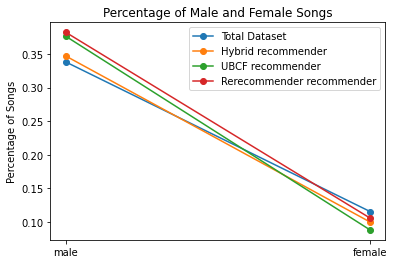

In [11]:
x =[1, 2]
full = [full_male_perc, full_female_perc]
hyb = [hyb_male_perc, hyb_female_perc]
ubcf = [ubcf_male_perc, ubcf_female_perc]
rerec = [rerec_male_perc, rerec_female_perc]

labels = ["male", "female"]

plt.plot(x, full, label = "Total Dataset", marker='o')
plt.plot(x, hyb, label = "Hybrid recommender", marker='o')
plt.plot(x, ubcf, label = "UBCF recommender", marker='o')
plt.plot(x, rerec, label = "Rerecommender recommender", marker='o')

plt.legend()

plt.ylabel("Percentage of Songs")
plt.title("Percentage of Male and Female Songs")
          
plt.xticks(x,labels)
plt.show()

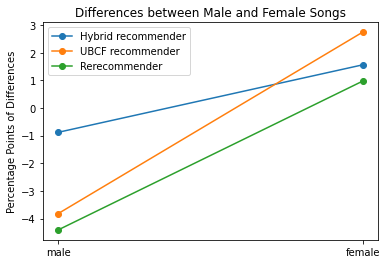

In [12]:
x =[1, 2]
hyb = [hyb_dif_male, hyb_dif_female]
ubcf = [ubcf_dif_male, ubcf_dif_female]
rerec = [rerec_dif_male, rerec_dif_female]

labels = ["male", "female"]

plt.plot(x, hyb, label = "Hybrid recommender", marker='o')
plt.plot(x, ubcf, label = "UBCF recommender", marker='o')
plt.plot(x, rerec, label = "Rerecommender recommender", marker='o')

plt.legend(["Hybrid recommender", "UBCF recommender", "Rerecommender"])

plt.ylabel("Percentage Points of Differences")
plt.title("Differences between Male and Female Songs")
          
plt.xticks(x,labels)
plt.show()

Explanation of bar chart
TODO:
- style
- show the actual values in the chart

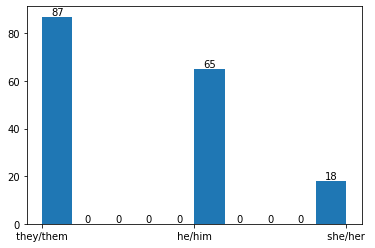

In [13]:
counts, edges, bars = plt.hist(rerec_recs["pronoun"])
plt.bar_label(bars)
plt.show()

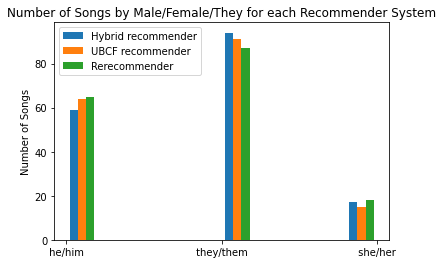

In [14]:
# TODO Style
plt.hist([hyb_recs["pronoun"], ubcf_recs["pronoun"], rerec_recs["pronoun"]])

plt.legend(["Hybrid recommender", "UBCF recommender", "Rerecommender"])

plt.ylabel("Number of Songs")
plt.title("Number of Songs by Male/Female/They for each Recommender System")

plt.show()

Weight analysis

In [15]:
hyb_male = hyb_recs[hyb_recs["pronoun"] == " he/him "]
hyb_male_weight = hyb_male.sum(numeric_only = True)
hyb_male_weight = hyb_male_weight[0]
print(f"hyb_male_weight: {hyb_male_weight}")

hyb_female = hyb_recs[hyb_recs["pronoun"] == " she/her "]
hyb_female_weight = hyb_female.sum(numeric_only = True)
hyb_female_weight = hyb_female_weight[0]
print(f"hyb_female_weight: {hyb_female_weight}")

hyb_male_weight: 171
hyb_female_weight: 61


In [16]:
ubcf_male = ubcf_recs[ubcf_recs["pronoun"] == " he/him "]
ubcf_male_weight = ubcf_male.sum(numeric_only = True)
ubcf_male_weight = ubcf_male_weight[0]
print(f"ubcf_male_weight: {ubcf_male_weight}")

ubcf_female = ubcf_recs[ubcf_recs["pronoun"] == " she/her "]
ubcf_female_weight = ubcf_female.sum(numeric_only = True)
ubcf_female_weight = ubcf_female_weight[0]
print(f"ubcf_female_weight: {ubcf_female_weight}")

ubcf_male_weight: 205
ubcf_female_weight: 45


In [17]:
rerec_male = rerec_recs[rerec_recs["pronoun"] == " he/him "]
rerec_male_weight = rerec_male.sum(numeric_only = True)
rerec_male_weight = rerec_male_weight[0]
print(f"rerec_male_weight: {rerec_male_weight}")

rerec_female = rerec_recs[rerec_recs["pronoun"] == " she/her "]
rerec_female_weight = rerec_female.sum(numeric_only = True)
rerec_female_weight = rerec_female_weight[0]
print(f"rerec_female_weight: {rerec_female_weight}")

rerec_male_weight: 192
rerec_female_weight: 46


In [18]:
avg_male_hyb_weight = round(hyb_male_weight / male_songs_hyb, 2)
avg_female_hyb_weight = round(hyb_female_weight / female_songs_hyb, 2)

avg_male_ubcf_weight = round(ubcf_male_weight / male_songs_ubcf, 2)
avg_female_ubcf_weight = round(ubcf_female_weight / female_songs_ubcf, 2)

avg_male_rerec_weight = round(rerec_male_weight / male_songs_rerec, 2)
avg_female_rerec_weight = round(rerec_female_weight / female_songs_rerec, 2)

In [19]:
print(f"avg_male_hyb_weight = {avg_male_hyb_weight}")
print(f"avg_female_hyb_weight = {avg_female_hyb_weight}")

print(f"avg_male_ubcf_weight = {avg_male_ubcf_weight}")
print(f"avg_female_ubcf_weight = {avg_female_ubcf_weight}")

print(f"avg_male_rerec_weight = {avg_male_rerec_weight}")
print(f"avg_female_rerec_weight = {avg_female_rerec_weight}")

avg_male_hyb_weight = 2.9
avg_female_hyb_weight = 3.59
avg_male_ubcf_weight = 3.2
avg_female_ubcf_weight = 3.0
avg_male_rerec_weight = 2.95
avg_female_rerec_weight = 2.56


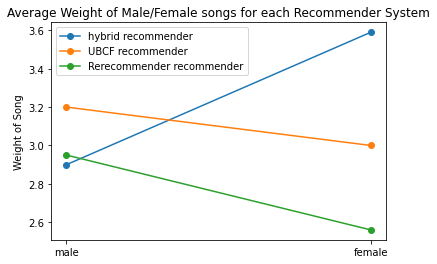

In [20]:
x =[1, 2]
hyb = [avg_male_hyb_weight, avg_female_hyb_weight]
ubcf = [avg_male_ubcf_weight, avg_female_ubcf_weight]
rerec = [avg_male_rerec_weight, avg_female_rerec_weight]

labels = ["male", "female"]

plt.plot(x, hyb, label = "hybrid recommender", marker='o')
plt.plot(x, ubcf, label = "UBCF recommender", marker='o')
plt.plot(x, rerec, label = "Rerecommender recommender", marker='o')

plt.legend()

plt.ylabel("Weight of Song")
plt.title("Average Weight of Male/Female songs for each Recommender System")
          
plt.xticks(x,labels)
plt.show()

Rap

In [21]:
hyb_recs_rap = hyb_recs[(hyb_recs['genre_1'].str.contains('rap')) | (hyb_recs['genre_2'].str.contains('rap')) | (hyb_recs['genre_3'].str.contains('rap'))]
hyb_recs_rap

,song,artist,pronoun,genre_1,genre_2,genre_3,weights
2,Mind Of A Killer,Tech N9ne,he/him,pop rap,insights_high_priority_artists,hip hop,3
6,Lolita,Mustard Plug,they/them,modern ska punk,grand rapids indie,Punk,4
23,Mend Your Ways,Mustard Plug,they/them,modern ska punk,grand rapids indie,Punk,2
33,Children Of The Gun,Drowning Pool,they/them,Hard Rock,alternative metal,rap metal,2
34,King Zero,Drowning Pool,they/them,Hard Rock,alternative metal,rap metal,1
41,Mind Of A Killer,Tech N9ne,he/him,pop rap,insights_high_priority_artists,hip hop,4
43,Where My Money (I Need That),Rick Ross,he/him,pop rap,hip hop,Gangsta Rap,2
48,Return Of The Phantom Stranger,Rob Zombie,he/him,Metal,rap rock,Rock,2
61,Over My Head,Drowning Pool,they/them,Hard Rock,alternative metal,rap metal,4
63,Mind Of A Killer,Tech N9ne,he/him,Hip-Hop/Rap,gangster rap,pop rap,2


In [22]:
ubcf_recs_rap = ubcf_recs[(ubcf_recs['genre_1'].str.contains('rap')) | (ubcf_recs['genre_2'].str.contains('rap')) | (ubcf_recs['genre_3'].str.contains('rap'))]
ubcf_recs_rap

,song,artist,pronoun,genre_1,genre_2,genre_3,weights
6,Going Bad,Tech N9ne,he/him,hip hop,rap,pop rap,4
7,Seven Words featuring Skatterman_ Krizz Kaliko,Tech N9ne,he/him,hip hop,rap,pop rap,3
20,That Owl,Tech N9ne,he/him,hip hop,rap,pop rap,5
21,One Night Stand,Tech N9ne,he/him,hip hop,rap,pop rap,4
22,Come Gangsta,Tech N9ne,he/him,hip hop,rap,pop rap,3
31,Call Girlz,Tech N9ne,he/him,hip hop,rap,pop rap,4
32,He Wanna Be Paid,Tech N9ne,he/him,hip hop,rap,pop rap,3
33,The P.A.S.E.O. (The Poem Aaron Saw Extra Ordin...,Tech N9ne,he/him,hip hop,rap,pop rap,2
43,Keep Away,Godsmack,they/them,post-grunge,rap rock,Rock,2
44,Spiral,Godsmack,they/them,post-grunge,rap rock,Rock,1


In [23]:
rerec_recs_rap = rerec_recs[(rerec_recs['genre_1'].str.contains('rap')) | (rerec_recs['genre_2'].str.contains('rap')) | (rerec_recs['genre_3'].str.contains('rap'))]
rerec_recs_rap

,song,artist,pronoun,genre_1,genre_2,genre_3,weights
26,Sawdust In The Blood,Rob Zombie,he/him,Metal,rap rock,Rock,4
28,Iron Head,Rob Zombie,he/him,Metal,rap rock,Rock,2
29,Children Of The Gun,Drowning Pool,they/them,Hard Rock,alternative metal,rap metal,1
60,Through The Wire,Kanye West,he/him,rap,insights_high_priority_artists,Hip-Hop/Rap,5
62,Hey Mama,Kanye West,he/him,rap,insights_high_priority_artists,Hip-Hop/Rap,3
63,Homecoming,Kanye West,he/him,rap,insights_high_priority_artists,Hip-Hop/Rap,2
64,RoboCop,Kanye West,he/him,rap,insights_high_priority_artists,Hip-Hop/Rap,1
102,Mind Of A Killer,Tech N9ne,he/him,pop rap,hip hop,rap,3
104,Mind Of A Killer,Tech N9ne,he/him,rap,hip hop,pop rap,1
110,American Superstar [Feat. Lil Wayne] (Explicit...,Flo Rida,he/him,pop rap,Hip-Hop/Rap,Dance,5


In [24]:
full_df_rap = full_df[(full_df['genre_1'].str.contains('rap')) | (full_df['genre_2'].str.contains('rap')) | (full_df['genre_3'].str.contains('rap'))]
full_df_rap

,artist,song,pronoun,genre_1,genre_2,genre_3
1643,Kanye West,Stronger,he/him,rap,insights_high_priority_artists,Hip-Hop/Rap
1644,Kanye West,Stronger,he/him,rap,insights_high_priority_artists,Hip-Hop/Rap
1645,Kanye West,Stronger,he/him,rap,insights_high_priority_artists,Hip-Hop/Rap
1646,Kanye West,Stronger,he/him,rap,insights_high_priority_artists,Hip-Hop/Rap
1647,Kanye West,Stronger,he/him,rap,insights_high_priority_artists,Hip-Hop/Rap
...,...,...,...,...,...,...
98757,Krizz Kaliko,Slow Down featuring Tech N9ne & Agginy,he/him,country rap,Hip-Hop/Rap,Hip-Hop
98838,Life Of Agony,Tangerine (Album Version),they/them,Rock,rap rock,alternative metal
98876,Tech N9ne Collabos,Blown Away,he/him,rap rock,Hip-Hop/Rap,rap rock
98877,Tech N9ne Collabos,Red Nose,he/him,rap rock,Hip-Hop/Rap,rap rock


In [25]:
# Full_df
male_songs_full_rap = (full_df_rap["pronoun"] == "he/him").sum()
female_songs_full_rap = (full_df_rap["pronoun"] == "she/her").sum()
they_songs_full_rap = (full_df_rap["pronoun"] == "they/them").sum()

# hyb_recs
male_songs_hyb_rap = (hyb_recs_rap["pronoun"] == " he/him ").sum()
female_songs_hyb_rap = (hyb_recs_rap["pronoun"] == " she/her ").sum()
they_songs_hyb_rap = (hyb_recs_rap["pronoun"] == " they/them ").sum()

# ubcf_recs
male_songs_ubcf_rap = (ubcf_recs_rap["pronoun"] == " he/him ").sum()
female_songs_ubcf_rap = (ubcf_recs_rap["pronoun"] == " she/her ").sum()
they_songs_ubcf_rap = (ubcf_recs_rap["pronoun"] == " they/them ").sum()

# rerec_recs
male_songs_rerec_rap = (rerec_recs_rap["pronoun"] == " he/him ").sum()
female_songs_rerec_rap = (rerec_recs_rap["pronoun"] == " she/her ").sum()
they_songs_rerec_rap = (rerec_recs_rap["pronoun"] == " they/them ").sum()

In [26]:
rap_full_male_perc = round(100 * (male_songs_full_rap/len(full_df_rap)), 2)
rap_full_female_perc = round(100 * (female_songs_full_rap/len(full_df_rap)), 2)
rap_full_they_perc = round(100 * (they_songs_full_rap/len(full_df_rap)), 2)

rap_hyb_male_perc = round(100 * (male_songs_hyb_rap/len(hyb_recs_rap)), 2)
rap_hyb_female_perc = round(100 * (female_songs_hyb_rap/len(hyb_recs_rap)), 2)
rap_hyb_they_perc = round(100 * (they_songs_hyb_rap/len(hyb_recs_rap)), 2)

rap_ubcf_male_perc = round(100 * (male_songs_ubcf_rap/len(ubcf_recs_rap)), 2)
rap_ubcf_female_perc = round(100 * (female_songs_ubcf_rap/len(ubcf_recs_rap)), 2)
rap_ubcf_they_perc = round(100 * (they_songs_ubcf_rap/len(ubcf_recs_rap)), 2)

rap_rerec_male_perc = round(100 * (male_songs_rerec_rap/len(rerec_recs_rap)), 2)
rap_rerec_female_perc = round(100 * (female_songs_rerec_rap/len(rerec_recs_rap)), 2)
rap_rerec_they_perc = round(100 * (they_songs_rerec_rap/len(rerec_recs_rap)), 2)

*** make sure to explain how they/them is excluded

In [27]:
print(f"rap_full_male_perc: {rap_full_male_perc}")
print(f"rap_full_female_perc: {rap_full_female_perc}")
print(f"rap_full_they_perc: {rap_full_they_perc}")

print(f"rap_hyb_male_perc: {rap_hyb_male_perc}")
print(f"rap_hyb_female_perc: {rap_hyb_female_perc}")
print(f"rap_hyb_they_perc: {rap_hyb_they_perc}")

print(f"rap_ubcf_male_perc: {rap_ubcf_male_perc}")
print(f"rap_ubcf_female_perc: {rap_ubcf_female_perc}")
print(f"rap_ubcf_they_perc: {rap_ubcf_they_perc}")

print(f"rap_rerec_male_perc: {rap_rerec_male_perc}")
print(f"rap_rerec_female_perc: {rap_rerec_female_perc}")
print(f"rap_rerec_they_perc: {rap_rerec_they_perc}")

rap_full_male_perc: 51.48
rap_full_female_perc: 1.32
rap_full_they_perc: 47.2
rap_hyb_male_perc: 58.82
rap_hyb_female_perc: 0.0
rap_hyb_they_perc: 41.18
rap_ubcf_male_perc: 81.82
rap_ubcf_female_perc: 0.0
rap_ubcf_they_perc: 18.18
rap_rerec_male_perc: 86.67
rap_rerec_female_perc: 0.0
rap_rerec_they_perc: 13.33


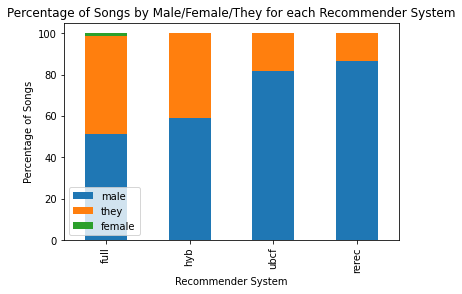

In [28]:
df = pd.DataFrame(index=['full', 'hyb', 'ubcf', 'rerec'], 
                  data={'male': [rap_full_male_perc, rap_hyb_male_perc, rap_ubcf_male_perc, rap_rerec_male_perc], 
                        'they': [rap_full_they_perc, rap_hyb_they_perc, rap_ubcf_they_perc, rap_rerec_they_perc],
                        'female': [rap_full_female_perc, rap_hyb_female_perc, rap_ubcf_female_perc, rap_rerec_female_perc]})

ax = df.plot(kind="bar", stacked=True)

plt.ylabel("Percentage of Songs")
plt.xlabel("Recommender System")
plt.title("Percentage of Songs by Male/Female/They for each Recommender System")

plt.show()